In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

In [15]:
#генерируем выборку объема 1000
X = np.linspace(-3, 3, 1000)

In [16]:
#генерируем выборку распределения Лапласа (F), c l=2 (коэфф. масштаба) и b=5 (сдвиг) и плотность распределения df
l, b = 2, 0
F = np.array([])
df = np.array([])
for itm in X:
    if itm <= b:
        F = np.append(F, 0.5 * math.exp(l * (itm - b)))
    else:
        F = np.append(F, 1 - 0.5 * math.exp(-l * (itm - b)))
    df = np.append(df, l / 2 * math.exp(-l * abs(itm - b)))    

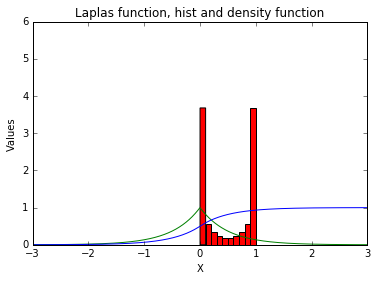

In [21]:
plt.xlabel('X')
plt.ylabel('Values')
plt.title('Laplas function, hist and density function')
plt.hist(F, 10, normed = 1, facecolor = 'r')
plt.plot(X, df, 'g')
plt.plot(X, F, 'b')
plt.axis([-3, 3, 0, 6])
plt.show()

In [22]:
#оценка распределение выборочного среднего случайной величины при разных объёмах выборок. 
#Cгенерируем 1000 выборок обЪема 5, 10, 50
rng = range(0, 1000)
f5 = np.array([np.random.choice(X, 5) for itm in rng])
f10 = np.array([np.random.choice(X, 10) for itm in rng])
f50 = np.array([np.random.choice(X, 50) for itm in rng])

In [23]:
#Расчитаем среднее по каждой выборке
f5_avg = [np.average(itm) for itm in f5]
f10_avg = [np.average(itm) for itm in f10]
f50_avg = [np.average(itm) for itm in f50]

(array([ 0.03644921,  0.13972198,  0.57711252,  1.08740149,  1.56731611,
         1.433669  ,  0.78365806,  0.35234238,  0.08504816,  0.01214974]),
 array([-0.8018018 , -0.63718919, -0.47257658, -0.30796396, -0.14335135,
         0.02126126,  0.18587387,  0.35048649,  0.5150991 ,  0.67971171,
         0.84432432]),
 <a list of 10 Patch objects>)

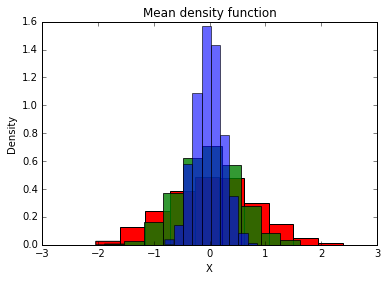

In [24]:
#гистограмма среднего
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Mean density function')
plt.hist(f5_avg, 10, normed = 1, facecolor = 'r')
plt.hist(f10_avg, 10, normed = 1, facecolor = 'g', alpha = 0.8)
plt.hist(f50_avg, 10, normed = 1, facecolor = 'b', alpha = 0.6)

In [8]:
#Теоретическое среднее (m_df = b) и дисперсия (sigma_df2 = 2 / (l*l)) распределения Лапласа
#Считаем параметры нормального распределения mu, sigma

(array([ 0.02485749,  0.12654723,  0.24405537,  0.38416124,  0.48811075,
         0.47681189,  0.30280945,  0.14914495,  0.04745521,  0.0158184 ]),
 array([-2.04024024, -1.59771772, -1.1551952 , -0.71267267, -0.27015015,
         0.17237237,  0.61489489,  1.05741742,  1.49993994,  1.94246246,
         2.38498498]),
 <a list of 10 Patch objects>)

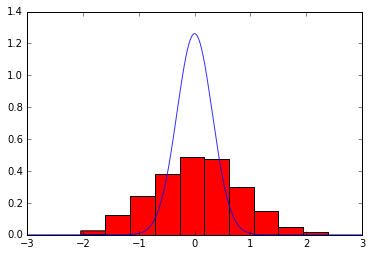

In [26]:
#Выборка объема 5
m_df_5, sigma_df_5 = b, math.sqrt(2) / (l * math.sqrt(5))
#теоретическая плотность распределения
pdf = sts.norm.pdf(X, m_df_5, sigma_df_5)
plt.plot(X, pdf, label='theoretical pdf', alpha=0.8)
plt.hist(f5_avg, 10, normed = 1, facecolor = 'r')

(array([ 0.00572362,  0.02861808,  0.16026126,  0.36917326,  0.62387418,
         0.70686662,  0.56949983,  0.2804572 ,  0.08299244,  0.0343417 ]),
 array([-1.88228228, -1.53285285, -1.18342342, -0.83399399, -0.48456456,
        -0.13513514,  0.21429429,  0.56372372,  0.91315315,  1.26258258,
         1.61201201]),
 <a list of 10 Patch objects>)

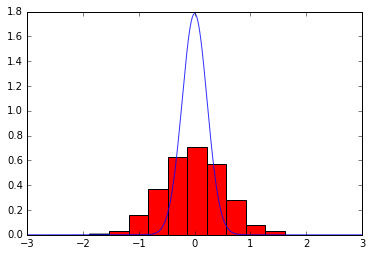

In [27]:
#Выборка объема 10
m_df_10, sigma_df_10 = b, math.sqrt(2) / (l * math.sqrt(10))
#теоретическая плотность распределения
norm_rv = sts.norm(m_df_10, sigma_df_10)
pdf = norm_rv.pdf(X)
plt.plot(X, pdf, label='theoretical pdf', alpha=0.8)
plt.hist(f10_avg, 10, normed = 1, facecolor = 'r')

(array([ 0.03644921,  0.13972198,  0.57711252,  1.08740149,  1.56731611,
         1.433669  ,  0.78365806,  0.35234238,  0.08504816,  0.01214974]),
 array([-0.8018018 , -0.63718919, -0.47257658, -0.30796396, -0.14335135,
         0.02126126,  0.18587387,  0.35048649,  0.5150991 ,  0.67971171,
         0.84432432]),
 <a list of 10 Patch objects>)

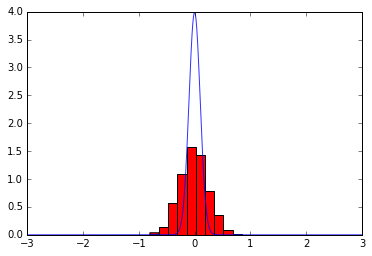

In [28]:
#Выборка объема 50
m_df_50, sigma_df_50 = b, math.sqrt(2) / (l * math.sqrt(50))
#теоретическая плотность распределения
norm_rv = sts.norm(m_df_50, sigma_df_50)
pdf = norm_rv.pdf(X)
plt.plot(X, pdf, label='theoretical pdf', alpha=0.8)
plt.hist(f50_avg, 10, normed = 1, facecolor = 'r')

In [32]:
print "Среднее и стандартное отклонения для выборки из 5 элементов"
print "Mean: {}, std: {}".format(m_df_5, sigma_df_5)

Среднее и стандартное отклонения для выборки из 5 элементов
Mean: 0, std: 0.316227766017


In [33]:
print "Среднее и стандартное отклонения для выборки из 10 элементов"
print "Mean: {}, std: {}".format(m_df_10, sigma_df_10)

Среднее и стандартное отклонения для выборки из 10 элементов
Mean: 0, std: 0.22360679775


In [34]:
print "Среднее и стандартное отклонения для выборки из 50 элементов"
print "Mean: {}, std: {}".format(m_df_50, sigma_df_50)

Среднее и стандартное отклонения для выборки из 50 элементов
Mean: 0, std: 0.1


С ростом n плотность распределения среднего "сжимается", что показывает стандартное отклонение, оно уменьшается, т.е. уменьшается ошибка определения среднего. 
Среднее значение концентрируется вокруг истинного среднего.